In [71]:
from statistics import LinearRegression

import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNet,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.metrics import classification_report, mean_absolute_error, r2_score, f1_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier, BaggingRegressor, \
    RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from tqdm import tqdm


In [33]:
sonar=pd.read_csv("Sonar.csv")
y=sonar["Class"]
X=sonar.drop("Class",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,stratify=y)
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [34]:
dtc=DecisionTreeClassifier(random_state=25)
knn=KNeighborsClassifier()
nb=GaussianNB()
bagg=BaggingClassifier(estimator=nb,random_state=10)
bagg.fit(X_train,y_train)
y_pred=bagg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68        34
           1       0.61      0.48      0.54        29

    accuracy                           0.62        63
   macro avg       0.62      0.61      0.61        63
weighted avg       0.62      0.62      0.61        63



In [35]:
y_train

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [36]:
X_train.shape

(145, 60)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

scores=[]
lr=LogisticRegression()
n_est=[10,15,25,50]
estimators=[dtc,knn,nb,lr]
for e in tqdm(estimators):
    for n in n_est:
        bagg=BaggingClassifier(estimator=e,n_estimators=n,random_state=25,bootstrap=True)
        bagg.fit(X_train,y_train)
        y_pred_prob=bagg.predict_proba(X_test)
        scores.append([n,e,log_loss(y_test,y_pred_prob)])
scores=pd.DataFrame(scores,columns=['B-Samples',"estimator","Log Loss"])
scores.sort_values('Log Loss')

100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


,B-Samples,estimator,Log Loss
4,10,KNeighborsClassifier(),0.422282
5,15,KNeighborsClassifier(),0.431490
6,25,KNeighborsClassifier(),0.432707
7,50,KNeighborsClassifier(),0.447037
2,25,DecisionTreeClassifier(random_state=25),0.475750
0,10,DecisionTreeClassifier(random_state=25),0.477146
3,50,DecisionTreeClassifier(random_state=25),0.490503
1,15,DecisionTreeClassifier(random_state=25),0.502120
13,15,LogisticRegression(),0.534413
12,10,LogisticRegression(),0.537041


In [44]:
hr=pd.read_csv("HR_comma_sep.csv")
y=hr['left']
X=hr.drop("left",axis=1)
ohe=OneHotEncoder(drop='first',sparse_output=False).set_output(transform="pandas")
X=ohe.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
dtc=DecisionTreeClassifier(random_state=25)
knn=KNeighborsClassifier()
nb=GaussianNB()
lr=LogisticRegression()
n_est=[10,15,25,50]
estimators=[dtc,knn,nb,lr]
scores=[]
for e in tqdm(estimators):
    for n in n_est:
        bagg=BaggingClassifier(estimator=e,n_estimators=n,random_state=25,bootstrap=True)
        bagg.fit(X_train,y_train)
        y_pred_prob=bagg.predict_proba(X_test)
        scores.append([n,e,log_loss(y_test,y_pred_prob)])
scores=pd.DataFrame(scores,columns=['B-Samples',"estimator","Log Loss"])
scores.sort_values('Log Loss')
bagg.fit(X_train,y_train)
y_pred=bagg.predict(X_test)
print(classification_report(y_test,y_pred))



100%|██████████| 4/4 [02:24<00:00, 36.20s/it]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3407
           1       0.90      0.90      0.90      1092

    accuracy                           0.95      4499
   macro avg       0.93      0.93      0.93      4499
weighted avg       0.95      0.95      0.95      4499



In [45]:
scores=pd.DataFrame(scores,columns=['B-Samples',"estimator","Log Loss"])
scores.sort_values('Log Loss')

,B-Samples,estimator,Log Loss
14,25,LogisticRegression(),0.147705
15,50,LogisticRegression(),0.147988
13,15,LogisticRegression(),0.148002
12,10,LogisticRegression(),0.148343
7,50,KNeighborsClassifier(),0.268938
6,25,KNeighborsClassifier(),0.297369
5,15,KNeighborsClassifier(),0.304893
4,10,KNeighborsClassifier(),0.311774
3,50,DecisionTreeClassifier(random_state=25),0.328995
2,25,DecisionTreeClassifier(random_state=25),0.373893


In [59]:
concrete=pd.read_csv('Concrete_Data.csv')
X=concrete.drop('Strength',axis=1)
y=concrete['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
lr=LinearRegression()
knn=KNeighborsRegressor()
dtc=DecisionTreeRegressor(random_state=25)
estimators=[knn,dtc,lr]
n_est=[10,15,25,50]
scores=[]
for e in tqdm(estimators):
    for n in n_est:
        bagg=BaggingRegressor(estimator=e,n_estimators=n,random_state=25)
        bagg.fit(X_train,y_train)
        y_pred=bagg.predict(X_test)
        scores.append([n,e,r2_score(y_test,y_pred)])
scores=pd.DataFrame(scores,columns=['B-Samples',"estimator","R2 Score"])
scores.sort_values('R2 Score',ascending=False)

100%|██████████| 3/3 [00:01<00:00,  2.15it/s]


,B-Samples,estimator,R2 Score
6,25,DecisionTreeRegressor(random_state=25),0.881644
7,50,DecisionTreeRegressor(random_state=25),0.880861
5,15,DecisionTreeRegressor(random_state=25),0.877123
4,10,DecisionTreeRegressor(random_state=25),0.876503
3,50,KNeighborsRegressor(),0.712140
2,25,KNeighborsRegressor(),0.708045
1,15,KNeighborsRegressor(),0.702541
0,10,KNeighborsRegressor(),0.696449
8,10,LinearRegression(),0.634298
9,15,LinearRegression(),0.634216


In [68]:
concrete = pd.read_csv('Concrete_Data.csv')
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25)
dtr=DecisionTreeRegressor(random_state=25,max_depth=None)
bagg=BaggingRegressor(estimator=dtr,n_estimators=25,random_state=25,oob_score=True)
bagg.fit(X_train,y_train)
print('OOB SCore: ',bagg.oob_score_)

OOB SCore:  0.894564632485158


In [73]:
sonar=pd.read_csv("Sonar.csv")
y=sonar["Class"]
X=sonar.drop("Class",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,stratify=y)
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)
features=[2,3,4,5,6,7,8,9,10]
scores=[]
for f in features:
     rf=RandomForestClassifier(random_state=25,max_features=f)
     rf.fit(X_train,y_train)
     y_pred=rf.predict(X_test)
     scores.append([f,accuracy_score(y_test,y_pred)])
df_scores=pd.DataFrame(scores,columns=['Features','Accuracy'])
df_scores.sort_values('Accuracy',ascending=False)

,Features,Accuracy
3,5,0.761905
2,4,0.746032
1,3,0.746032
8,10,0.730159
4,6,0.730159
0,2,0.714286
5,7,0.714286
6,8,0.714286
7,9,0.698413


In [77]:
best_tree=RandomForestClassifier(random_state=25,max_depth=2,min_samples_leaf=20,min_samples_split=20)
best_tree.fit(X,y)
df_imp=pd.DataFrame({'feature':list(X.columns),'imp':best_tree.feature_importances_})
df_imp.sort_values('imp',ascending=False)

,feature,imp
11,V12,0.108107
9,V10,0.090541
10,V11,0.069083
12,V13,0.063527
48,V49,0.059346
8,V9,0.059200
50,V51,0.045012
44,V45,0.043042
46,V47,0.040067
3,V4,0.036771


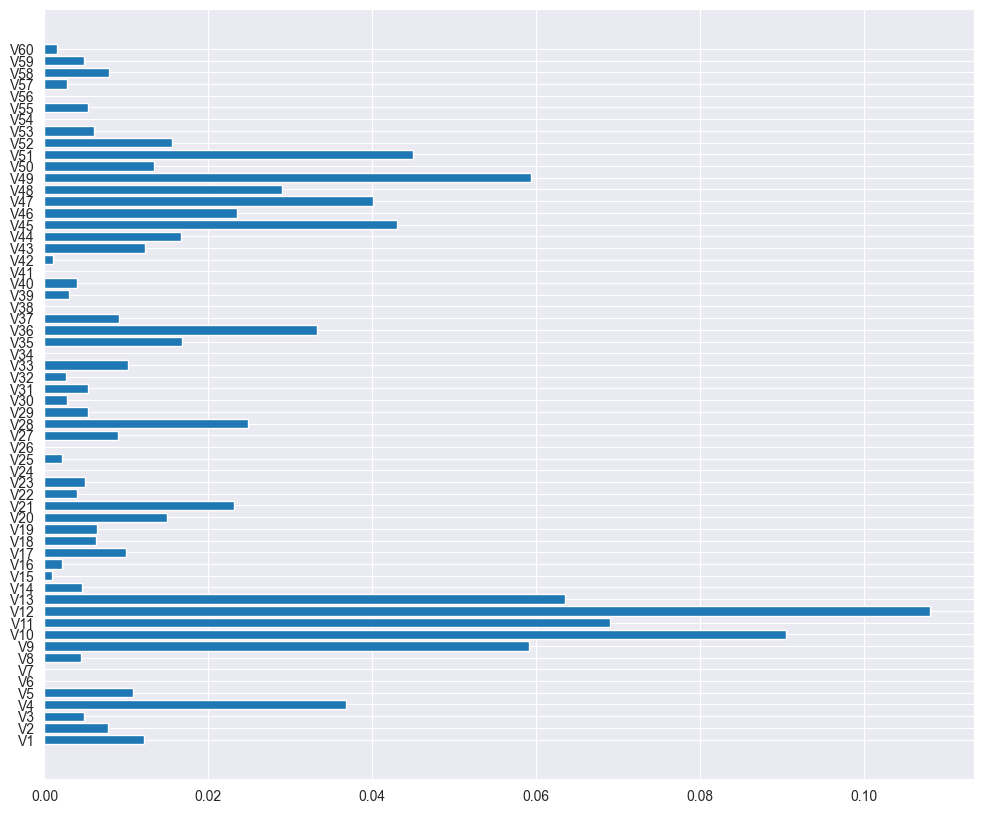

In [80]:
plt.figure(figsize=[12,10])
plt.barh(df_imp['feature'],df_imp['imp'])
plt.show()

In [74]:
dtr=DecisionTreeRegressor(random_state=25,max_depth=None)
bagg=BaggingRegressor(estimator=dtr,n_estimators=25,random_state=25)
bagg.fit(X_train,y_train)
y_pred=bagg.predict(X_test)

In [76]:
best_tree=DecisionTreeClassifier(random_state=25,max_depth=2,min_samples_leaf=20,min_samples_split=20)
best_tree.fit(X,y)
df_imp=pd.DataFrame({'feature':list(X.columns),'imp':best_tree.feature_importances_})
df_imp.sort_values('imp',ascending=False)

,feature,imp
10,V11,0.608121
15,V16,0.207139
3,V4,0.184741
1,V2,0.000000
2,V3,0.000000
4,V5,0.000000
6,V7,0.000000
5,V6,0.000000
7,V8,0.000000
8,V9,0.000000


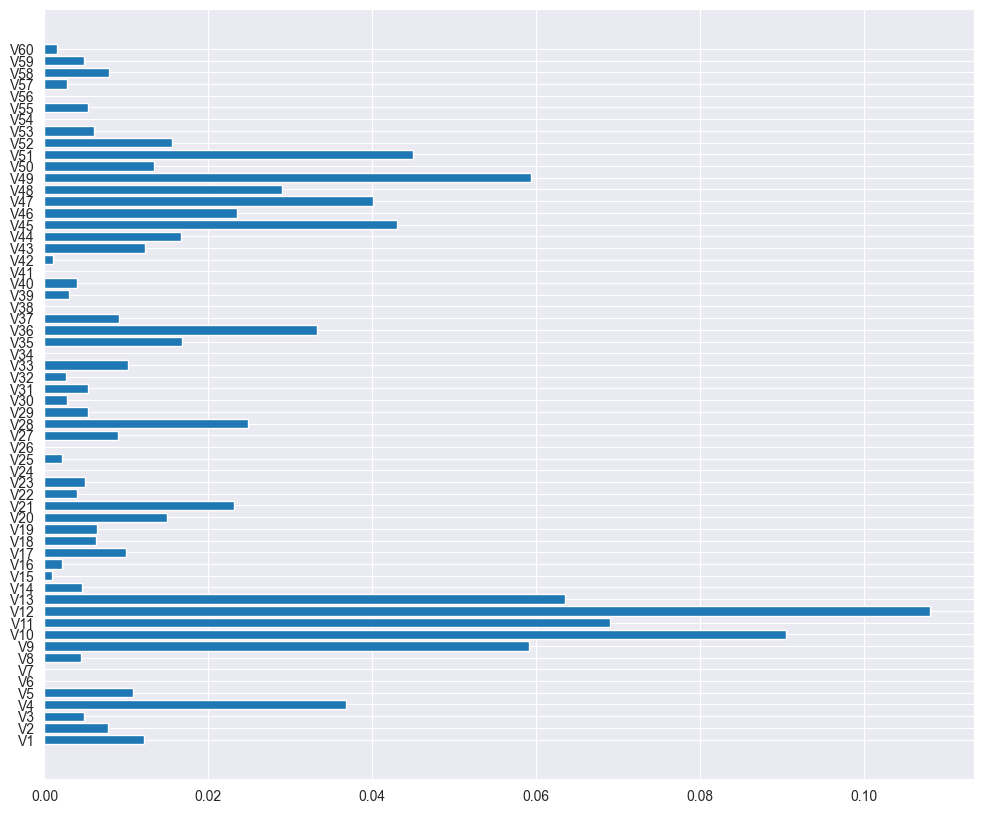

In [81]:
plt.figure(figsize=[12,10])
plt.barh(df_imp['feature'],df_imp['imp'])
plt.show()